In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


data_path='/Users/anastasiaclark/irs_nyc_migration/data'
nyc=['36005','36047','36061','36081','36085']

years=['2011','2012','2013','2014','2015', '2016']

metro_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','cbsa-est2016-modified.csv'),converters={'CBSA':str})
county_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','co-est2016-alldata.csv'), converters={'STATE':str,'COUNTY':str},encoding='LATIN-1')

In [76]:
metro_pep.head()
metro_pep.set_index('CBSA', inplace=True)

In [77]:
# county pep needs unique FIPS
county_pep.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,01,000,Alabama,Alabama,4779736,4780131,4785492,...,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,50,3,6,01,001,Alabama,Autauga County,54571,54571,54742,...,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.259290,-2.654256,4.255281
2,50,3,6,01,003,Alabama,Baldwin County,182265,182265,183199,...,21.672935,19.038117,17.311339,19.628723,15.757654,18.612620,22.757100,20.248574,18.585398,20.807611
3,50,3,6,01,005,Alabama,Barbour County,27457,27457,27348,...,-7.027927,-4.208488,-16.593442,-9.495549,-1.280316,-7.418561,-7.360829,-4.506434,-16.819716,-9.686991
4,50,3,6,01,007,Alabama,Bibb County,22915,22919,22861,...,-6.556506,0.088865,0.088747,1.504292,-4.956466,-4.318988,-5.980596,0.888652,0.887469,2.300681


In [78]:
county_pep['fips']=county_pep.STATE+county_pep.COUNTY
county_pep.set_index('fips',inplace=True)

In [79]:
# most columns are the same in county and metro pep dataset
# however, one column, NPOPCNHG has an underscore in county pep
# remove the udnderscore to make columns of interest be same in both datasets
col_names=[c.replace('_','') for c in county_pep.columns]
county_pep.columns=col_names

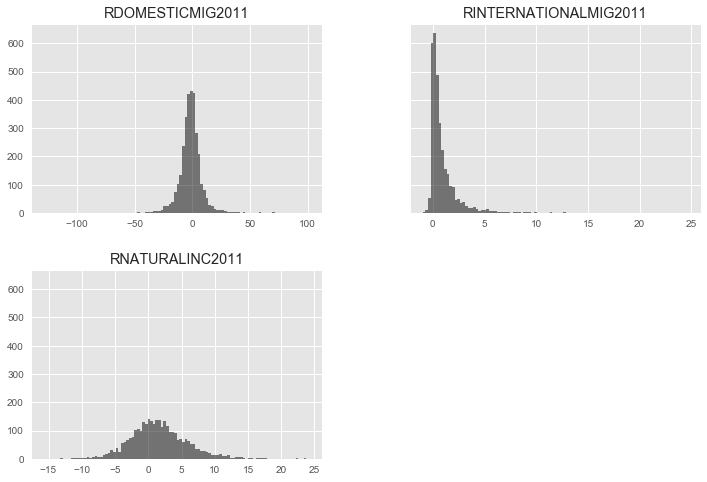

                  CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2011
fips                                                                       
48301       Loving County         Texas       3         7        101.123596
38053     McKenzie County  North Dakota       2         4         82.668059
49009      Daggett County          Utah       4         8         73.116362
38105     Williams County  North Dakota       2         4         69.925308
38007     Billings County  North Dakota       2         4         69.608452
22087  St. Bernard Parish     Louisiana       3         7         58.178388
30033     Garfield County       Montana       4         8         57.653268
38025         Dunn County  North Dakota       2         4         49.088167
35021      Harding County    New Mexico       4         8         45.779685
31171       Thomas County      Nebraska       2         4         44.843049


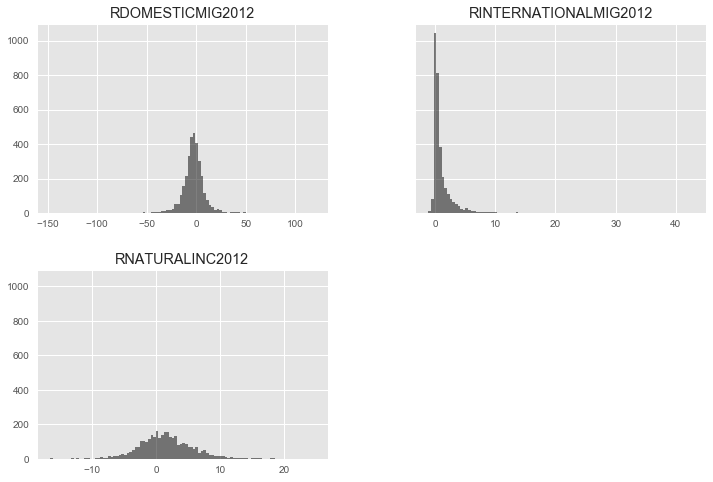

                CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2012
fips                                                                     
38053   McKenzie County  North Dakota       2         4        119.454837
13165    Jenkins County       Georgia       3         5        114.556816
38105   Williams County  North Dakota       2         4         80.589661
30109     Wibaux County       Montana       4         8         73.421439
38007   Billings County  North Dakota       2         4         69.634703
38061  Mountrail County  North Dakota       2         4         65.170940
30083   Richland County       Montana       4         8         58.051272
38089      Stark County  North Dakota       2         4         55.557689
12119     Sumter County       Florida       3         5         51.247927
38025       Dunn County  North Dakota       2         4         50.012957


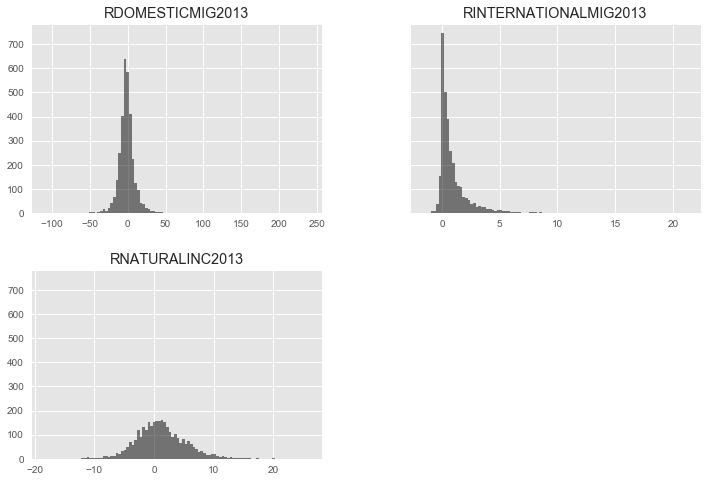

                CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2013
fips                                                                     
48301     Loving County         Texas       3         7        239.130435
38053   McKenzie County  North Dakota       2         4        138.227436
38105   Williams County  North Dakota       2         4         93.808231
32009  Esmeralda County        Nevada       4         8         92.442224
47007    Bledsoe County     Tennessee       3         6         72.998194
12119     Sumter County       Florida       3         5         72.957977
30109     Wibaux County       Montana       4         8         59.605685
38061  Mountrail County  North Dakota       2         4         56.535930
48311   McMullen County         Texas       3         7         53.404539
38013      Burke County  North Dakota       2         4         49.460432


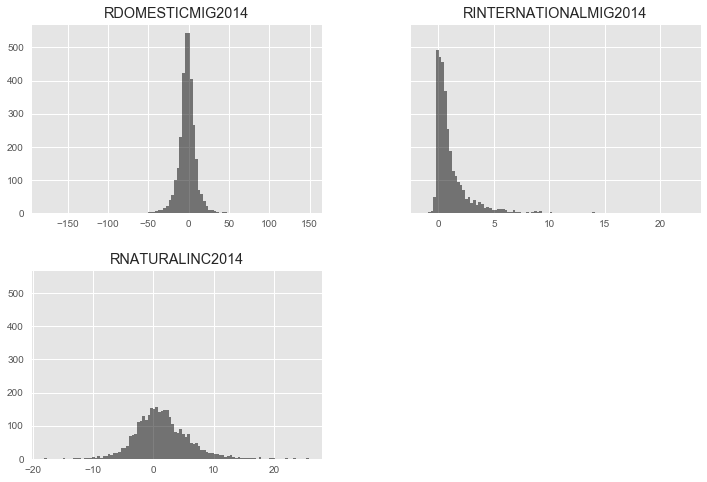

               CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2014
fips                                                                    
38053  McKenzie County  North Dakota       2         4        148.998269
48431  Sterling County         Texas       3         7         80.924855
38105  Williams County  North Dakota       2         4         67.399718
38089     Stark County  North Dakota       2         4         57.390124
08025   Crowley County      Colorado       4         8         48.842953
47007   Bledsoe County     Tennessee       3         6         47.316384
01107   Pickens County       Alabama       3         6         47.151277
12119    Sumter County       Florida       3         5         46.096052
31009    Blaine County      Nebraska       2         4         44.579534
13259   Stewart County       Georgia       3         5         41.901408


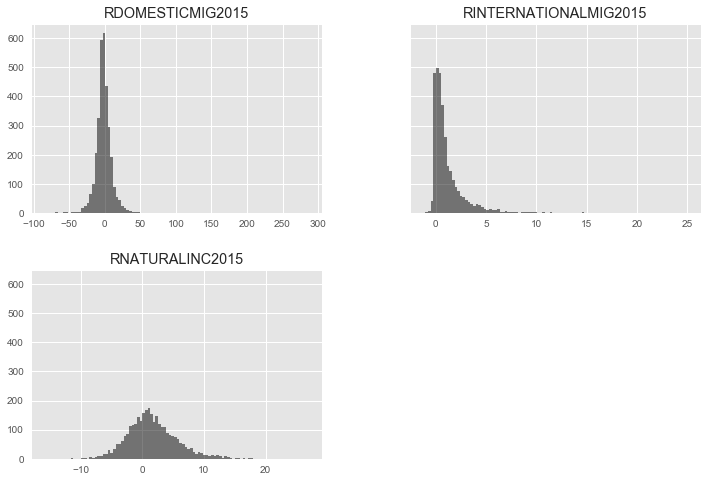

                 CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2015
fips                                                                      
48301      Loving County         Texas       3         7        287.128713
38053    McKenzie County  North Dakota       2         4        134.978107
48269        King County         Texas       3         7         83.788707
38105    Williams County  North Dakota       2         4         80.082926
12119      Sumter County       Florida       3         5         61.555901
31007      Banner County      Nebraska       2         4         59.431525
08079     Mineral County      Colorado       4         8         47.988709
38061   Mountrail County  North Dakota       2         4         47.761492
48229    Hudspeth County         Texas       3         7         44.391122
08014  Broomfield County      Colorado       4         8         42.535387


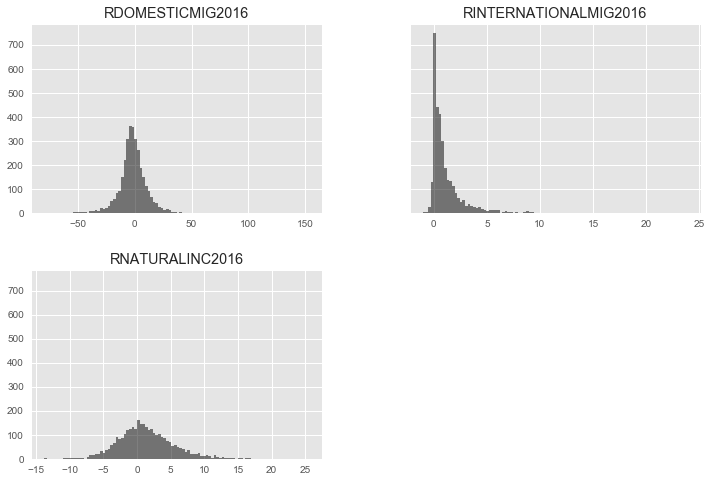

               CTYNAME    STNAME  REGION  DIVISION  RDOMESTICMIG2016
fips                                                                
48229  Hudspeth County     Texas       3         7        153.249532
49037  San Juan County      Utah       4         8         63.677075
48259   Kendall County     Texas       3         7         44.438018
08027    Custer County  Colorado       4         8         42.982165
30039   Granite County   Montana       4         8         40.865748
08091     Ouray County  Colorado       4         8         40.138699
12119    Sumter County   Florida       3         5         40.127142
41013     Crook County    Oregon       4         9         40.075084
08023  Costilla County  Colorado       4         8         39.813289
48209      Hays County     Texas       3         7         39.755014


In [80]:
# for each period year, plot distributions of the rates for natural increase, net domestic migration and net international migration
# and print 10 top counties with the highest domestic migration rate
for year in years:
    county_pep[['RNATURALINC{}'.format(year),'RDOMESTICMIG{}'.format(year),'RINTERNATIONALMIG{}'.format(year)]].hist(color='k', alpha=0.5, figsize=(12,8), bins=100,sharey=True)
    plt.show()
    print county_pep[['CTYNAME','STNAME','REGION','DIVISION','RDOMESTICMIG{}'.format(year)]].sort_values('RDOMESTICMIG{}'.format(year),ascending=False).head(n=10)

In [81]:
def rate_heat_map(rate_col,by_area,title):
    
    '''create a heat map of counties groupoed by
    passed area and fr the passed rate over the years'''
    
    divisions={1 : 'New England', 
            2 : 'Middle Atlantic', 
            3 : 'East North Central',
            4 : 'West North Central', 
            5 : 'South Atlantic', 
            6 : 'East South Central', 
            7 : 'West South Central', 
            8 : 'Mountain', 
            9 : 'Pacific'}     


    regions={1 :'Northeast', 
            2 : 'Midwest', 
            3 : 'South',  
            4 : 'West' }

    cols=county_pep.columns[(county_pep.columns.str.contains(rate_col))|(county_pep.columns.str.contains(by_area))]
    grouped=county_pep[cols].groupby(by_area).mean()
    # get the year on as the column name
    grouped.columns=[c[-4:] for c in grouped.columns]
    
    if by_area=='DIVISION':
        df=pd.Series(divisions).to_frame().rename(columns={0:'division'})
    elif by_area=='REGION':
        df=pd.Series(regions).to_frame().rename(columns={0:'regions'})
        
    grouped=grouped.merge(df, left_index=True, right_index=True).set_index(df.columns[0])
    sns.plt.title(title)
    sns.heatmap(grouped) 

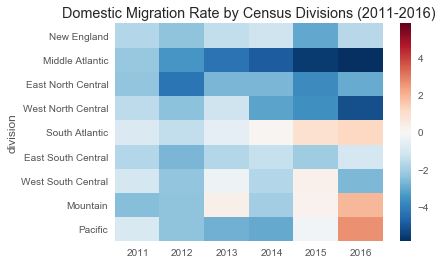

In [82]:
rate_heat_map('RDOMESTICMIG','DIVISION','Domestic Migration Rate by Census Divisions (2011-2016)')
# counties in the South Atlantic, Mountain and Pasific regions are getting higher domestic migration rates (on average)
# in the recent years while Middle Atlantic region is increasingly losing more domestic migrants then it is receiving 

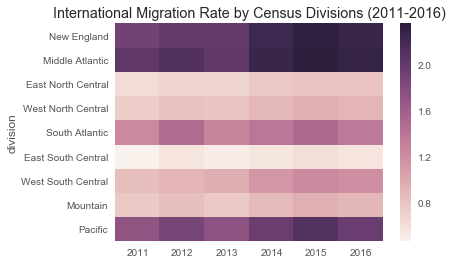

In [83]:
rate_heat_map('RINTERNATIONALMIG','DIVISION','International Migration Rate by Census Divisions (2011-2016)')

In [84]:
# get a subset of NYC counties
nyc_est=county_pep.loc[nyc]

# get a subset of records for New York Metro Area
ny_metro=metro_pep[metro_pep.NAME.str.contains('New York')].copy()

# create lists of columns that will be used in analysis
pop_change=[c for c in nyc_est.columns if c.startswith('NPOPCHG')]
nat_inc=[c for c in nyc_est.columns if c.startswith('NATURALINC')]
net_int=[c for c in nyc_est.columns if c.startswith('INTERNATIONALMIG')]
net_dom=[c for c in nyc_est.columns if c.startswith('DOMESTICMIG')]

In [85]:
keep_cols=pop_change+nat_inc+net_int+net_dom
nyc_est=nyc_est[keep_cols].copy()
nyc_est

,NPOPCHG2010,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
fips,,,,,,,,,,,,,,,,,,,,,
36005,3133,11750,14784,11776,11137,11509,6524,3263,13205,12789,...,16643,17308,17198,-3455,-17720,-13389,-14171,-18051,-16181,-20956
36047,5534,33427,28615,23062,17200,12397,4209,6597,26094,26419,...,22383,23318,22955,-5704,-15495,-17858,-21175,-32526,-33042,-43264
36061,2656,21003,15588,5332,4015,6700,2566,2738,9625,9965,...,16715,17422,17217,-2932,-3130,-9030,-16750,-22309,-16103,-21557
36081,4765,24446,18268,19574,16551,13079,5826,4262,16907,16297,...,25699,26697,26295,-4790,-16926,-21324,-17387,-26537,-25746,-35335
36085,976,1446,-174,1537,627,827,2046,592,2369,2213,...,1314,1394,1356,133,-2033,-3684,-1139,-2324,-1824,-299


In [86]:
ny_metro=ny_metro[keep_cols]
ny_metro

,NPOPCHG2010,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
CBSA,,,,,,,,,,,,,,,,,,,,,
35620,34328,150377,113258,104411,83389,65829,35571,30938,114909,113773,...,139938,145777,143731,-25641,-97755,-128006,-115765,-168503,-166950,-199996


In [87]:
# sum counties records to represent a single NYC record
city=nyc_est.sum(axis=0)

In [88]:
# function to reshape the data: make a row for each year of data
def reshape_dataset(df):
    # list to hold temporary dfs while reshaping
    dfs=[]
    for year in years:
        ixs=[i for i in df.index if year in i]
        yr=df.loc[ixs].reset_index().T
        yr.columns=yr.iloc[0]
        yr.drop(yr.index[0], inplace=True)
        yr.index=[year]
        # strip the year out of the column
        new_names=[n[0:len(n)-4].strip('_') for n in yr.columns]
        # assign new column names for a single year row
        yr.columns=new_names
        # append single year of data to the list 
        dfs.append(yr)
    # concatenate all the years
    reshaped=pd.concat(dfs)
    return reshaped

# function to plot the dataset as stacked bar chart
def plot_pop_change(df, title):
    leg_names=['Population Change','Net Domestic Migration','Net International Migreation','Natural Increase']
    ax=df[['DOMESTICMIG','INTERNATIONALMIG','NATURALINC']].plot(kind='bar',stacked=True, figsize=(8,5),legend=False,alpha=0.8,color=['#FFB834','#A0CCCF','#006944'])
    df['NPOPCHG'].plot(ax=ax, linestyle=':', color='black', linewidth=3, legend=True)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    lgd=plt.legend(leg_names, loc=8,bbox_to_anchor=(0.5, -0.2), ncol=4,prop = {'size':12.5},frameon=False)
    ax.set_title(title)
    plt.show()

In [89]:
# reshape the data for NYC
df1=reshape_dataset(city) 
df1

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,92072,68200,78044,-55304
2012,77081,67683,76138,-65285
2013,61281,65881,74595,-70622
2014,49530,64602,82754,-101747
2015,44512,60631,86139,-92896
2016,21171,57494,85021,-121411


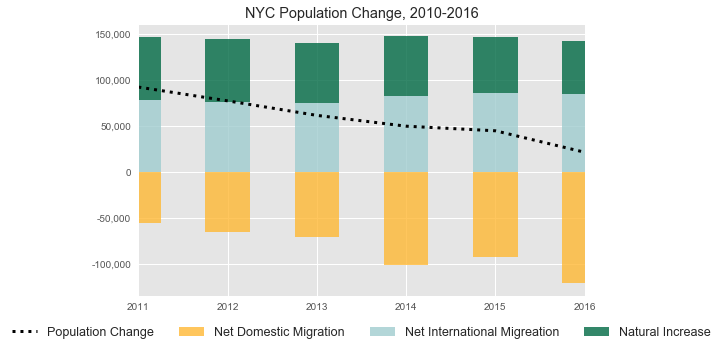

In [90]:
plot_pop_change(df1, 'NYC Population Change, 2010-2016')  

In [91]:
# reshape the data for New York metro
df2=reshape_dataset(ny_metro.T) 
df2

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,150377,114909,133814,-97755
2012,113258,113773,129274,-128006
2013,104411,106624,126294,-115765
2014,83389,108950,139938,-168503
2015,65829,101803,145777,-166950
2016,35571,94720,143731,-199996


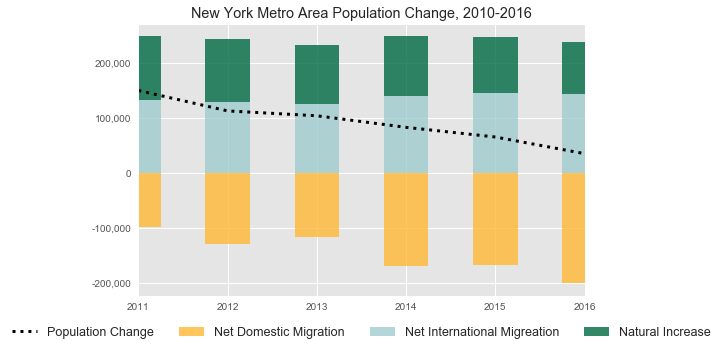

In [92]:
plot_pop_change(df2, 'New York Metro Area Population Change, 2010-2016') 